## INSTRUCTIONS

Every learner should submit his/her own homework solutions. However, you are allowed to discuss the homework with each other– but everyone must submit his/her own solution; you may not copy someone else’s solution.

The homework consists of two parts:
1. Data from our lives
2. Data manipulation/Exploratory Data Analysis
3. Multipe regression Analysis

Follow the prompts in the attached jupyter notebook. Download the data and place it in your working directory, or modify the path to upload it to your notebook. Add markdown cells to your analysis to include your solutions, comments, answers. **Add as many cells as you need**, for easy readability comment when possible.
Hopefully this homework will help you develop skills, make you understand the flow of an EDA, get you ready for individual work.

Submission: Send in both a ipynb and a pdf file of your work.

Good luck!


## 1. Data from our Lives

### Describe a situation or problem from your job, everyday life, current events, etc., for which a regression model would be appropriate. List some (up to 5) predictors that you might use.

**One of the application of regression model could be in predicting the winner of a car race. For example, Formula 1 race is going to happen, and wondering who is going to win the race, a regression model can be built to predict that. Some relevant predictors for building the model are Previous race results, driver skill, Weather conditions, Race strategies, Condition of the vehicle and so on.**





## The data

**Title: 1985 Auto Imports Database**

Relevant Information:
   -- Description
      This data set consists of three types of entities: (a) the
      specification of an auto in terms of various characteristics, (b)
      its assigned insurance risk rating, (c) its normalized losses in use
      as compared to other cars.  The second rating corresponds to the
      degree to which the auto is more risky than its price indicates.
      Cars are initially assigned a risk factor symbol associated with its
      price.   Then, if it is more risky (or less), this symbol is
      adjusted by moving it up (or down) the scale.  Actuarians call this
      process "symboling".  A value of +3 indicates that the auto is
      risky, -3 that it is probably pretty safe.

      The third factor is the relative average loss payment per insured
      vehicle year.  This value is normalized for all autos within a
      particular size classification (two-door small, station wagons,
      sports/speciality, etc...), and represents the average loss per car
      per year.

   -- Note: Several of the attributes in the database could be used as a
            "class" attribute.

5. Number of Instances: 205

6. Number of Attributes: 26 total
   -- 15 continuous
   -- 1 integer
   -- 10 nominal

7. Attribute Information:     
     Attribute:                Attribute Range:
     ------------------        -----------------------------------------------
  1. symboling:                -3, -2, -1, 0, 1, 2, 3.
  2. normalized-losses:        continuous from 65 to 256.
  3. make:                     alfa-romero, audi, bmw, chevrolet, dodge, honda,isuzu, jaguar, mazda, mercedes-benz, mercury, mitsubishi, nissan, peugot, plymouth, porsche, renault, saab, subaru, toyota,volkswagen, volvo
  4. fuel-type:                diesel, gas.
  5. aspiration:               std, turbo.
  6. num-of-doors:             four, two.
  7. body-style:               hardtop, wagon, sedan, hatchback, convertible.
  8. drive-wheels:             4wd, fwd, rwd.
  9. engine-location:          front, rear.
 10. wheel-base:               continuous from 86.6 120.9.
 11. length:                   continuous from 141.1 to 208.1.
 12. width:                    continuous from 60.3 to 72.3.
 13. height:                   continuous from 47.8 to 59.8.
 14. curb-weight:              continuous from 1488 to 4066.
 15. engine-type:              dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
 16. num-of-cylinders:         eight, five, four, six, three, twelve, two.
 17. engine-size:              continuous from 61 to 326.
 18. fuel-system:              1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
 19. bore:                     continuous from 2.54 to 3.94.
 20. stroke:                   continuous from 2.07 to 4.17.
 21. compression-ratio:        continuous from 7 to 23.
 22. horsepower:               continuous from 48 to 288.
 23. peak-rpm:                 continuous from 4150 to 6600.
 24. city-mpg:                 continuous from 13 to 49.
 25. highway-mpg:              continuous from 16 to 54.
 26. price:                    continuous from 5118 to 45400.

8. Missing Attribute Values: (denoted by "?")

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from scipy import stats
from sklearn.linear_model import LinearRegression
from statsmodels.compat import lzip
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline

In [3]:
#Read in data
path="/content/drive/MyDrive/DATASET/auto_imports1.csv"
df = pd.read_csv(path)


df.head()

,fuel_type,body,wheel_base,length,width,heights,curb_weight,engine_type,cylinders,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price
0,gas,convertible,88.6,168.8,64.1,48.8,2548,dohc,four,130,3.47,2.68,9.0,111,5000,21,27,13495
1,gas,convertible,88.6,168.8,64.1,48.8,2548,dohc,four,130,3.47,2.68,9.0,111,5000,21,27,16500
2,gas,hatchback,94.5,171.2,65.5,52.4,2823,ohcv,six,152,2.68,3.47,9.0,154,5000,19,26,16500
3,gas,sedan,99.8,176.6,66.2,54.3,2337,ohc,four,109,3.19,3.4,10.0,102,5500,24,30,13950
4,gas,sedan,99.4,176.6,66.4,54.3,2824,ohc,five,136,3.19,3.4,8.0,115,5500,18,22,17450


## 2. Data

## 2.1 Munging

Check what types of variables do you have in your data? Do you see anything that doesn't make sense? *Hint: horse power is  an object ?!*

In [4]:
##your code here
data_types = df.dtypes
print(data_types)

fuel_type       object
body            object
wheel_base     float64
length         float64
width          float64
heights        float64
curb_weight      int64
engine_type     object
cylinders       object
engine_size      int64
bore            object
stroke          object
comprassion    float64
horse_power     object
peak_rpm        object
city_mpg         int64
highway_mpg      int64
price            int64
dtype: object


### Replace '?' with None

### Change the variables: bore, stroke, horse_power, peak_rpm to float64

In [5]:
## Your code here

df = df.replace('?', None)

columns_to_convert = ['bore', 'stroke', 'horse_power', 'peak_rpm']
df[columns_to_convert] = df[columns_to_convert].astype('float64')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fuel_type    201 non-null    object 
 1   body         201 non-null    object 
 2   wheel_base   201 non-null    float64
 3   length       201 non-null    float64
 4   width        201 non-null    float64
 5   heights      201 non-null    float64
 6   curb_weight  201 non-null    int64  
 7   engine_type  201 non-null    object 
 8   cylinders    201 non-null    object 
 9   engine_size  201 non-null    int64  
 10  bore         197 non-null    float64
 11  stroke       197 non-null    float64
 12  comprassion  201 non-null    float64
 13  horse_power  199 non-null    float64
 14  peak_rpm     199 non-null    float64
 15  city_mpg     201 non-null    int64  
 16  highway_mpg  201 non-null    int64  
 17  price        201 non-null    int64  
dtypes: float64(9), int64(5), object(4)
memory usage: 2

### Drop body,engine_type,cylinders columns and name the new dataframe df2

In [7]:
## Your code here
df2 = df.drop(['body', 'engine_type', 'cylinders'], axis=1)


In [8]:
df2.head()

,fuel_type,wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price
0,gas,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,gas,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,gas,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,gas,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,gas,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450


### Drop all nan values

In [9]:
## your code goes here
df2 = df2.dropna()

In [10]:
df2.isnull().sum()

fuel_type      0
wheel_base     0
length         0
width          0
heights        0
curb_weight    0
engine_size    0
bore           0
stroke         0
comprassion    0
horse_power    0
peak_rpm       0
city_mpg       0
highway_mpg    0
price          0
dtype: int64

### Get dummy variables for fuel_type within df2 drop first level

In [11]:
## Your code goes here
df2 = pd.get_dummies(df2, columns=['fuel_type'], drop_first=True)

In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 0 to 200
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   wheel_base     195 non-null    float64
 1   length         195 non-null    float64
 2   width          195 non-null    float64
 3   heights        195 non-null    float64
 4   curb_weight    195 non-null    int64  
 5   engine_size    195 non-null    int64  
 6   bore           195 non-null    float64
 7   stroke         195 non-null    float64
 8   comprassion    195 non-null    float64
 9   horse_power    195 non-null    float64
 10  peak_rpm       195 non-null    float64
 11  city_mpg       195 non-null    int64  
 12  highway_mpg    195 non-null    int64  
 13  price          195 non-null    int64  
 14  fuel_type_gas  195 non-null    uint8  
dtypes: float64(9), int64(5), uint8(1)
memory usage: 23.0 KB


## 2.2 EDA on df2

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

Follow the lecture notes for ideas of how to perform EDA on your dataset. For help, here are the steps we talked about:

Suggested Steps in EDA:

    Provide descriptions of your sample and features
    Check for missing data
    Identify the shape of your data
    Identify significant correlations
    Spot/deal with outliers in the dataset

These steps are a guidline. Try different things and share your insights about the dataset (**df2**).

Don't forget to add "markdown" cells to include your findings or to explain what you are doing


#**Step 1 :Descriptions and features**

In [ ]:
## Your EDA should start here
df2.head()

,fuel_type,wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price
0,gas,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,gas,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,gas,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,gas,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,gas,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450


In [ ]:
df2.tail()

,fuel_type,wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price
196,gas,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114.0,5400.0,23,28,16845
197,gas,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160.0,5300.0,19,25,19045
198,gas,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134.0,5500.0,18,23,21485
199,diesel,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106.0,4800.0,26,27,22470
200,gas,109.1,188.8,68.9,55.5,3062,141,3.78,3.15,9.5,114.0,5400.0,19,25,22625


In [ ]:
df2.describe()

,wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,98.896410,174.256923,65.886154,53.861538,2559.000000,127.938462,3.329385,3.250308,10.194974,103.271795,5099.487179,25.374359,30.841026,13248.015385
std,6.132038,12.476443,2.132484,2.396778,524.715799,41.433916,0.271866,0.314115,4.062109,37.869730,468.271381,6.401382,6.829315,8056.330093
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.500000,166.300000,64.050000,52.000000,2145.000000,98.000000,3.150000,3.110000,8.500000,70.000000,4800.000000,19.500000,25.000000,7756.500000
50%,97.000000,173.200000,65.400000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5100.000000,25.000000,30.000000,10245.000000
75%,102.400000,184.050000,66.900000,55.650000,2943.500000,145.500000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,35.000000,16509.000000
max,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
df2.shape

(195, 15)

In [ ]:
df2.columns

Index(['fuel_type', 'wheel_base', 'length', 'width', 'heights', 'curb_weight',
       'engine_size', 'bore', 'stroke', 'comprassion', 'horse_power',
       'peak_rpm', 'city_mpg', 'highway_mpg', 'price'],
      dtype='object')

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 0 to 200
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fuel_type    195 non-null    object 
 1   wheel_base   195 non-null    float64
 2   length       195 non-null    float64
 3   width        195 non-null    float64
 4   heights      195 non-null    float64
 5   curb_weight  195 non-null    int64  
 6   engine_size  195 non-null    int64  
 7   bore         195 non-null    float64
 8   stroke       195 non-null    float64
 9   comprassion  195 non-null    float64
 10  horse_power  195 non-null    float64
 11  peak_rpm     195 non-null    float64
 12  city_mpg     195 non-null    int64  
 13  highway_mpg  195 non-null    int64  
 14  price        195 non-null    int64  
dtypes: float64(9), int64(5), object(1)
memory usage: 24.4+ KB


#**Step 2 :Checking Missing value**

In [ ]:
print("There are {} missing values in the data.".format(df2.isna().sum().sum()))

There are 0 missing values in the data.


In [ ]:
df2.length.unique()

array([168.8, 171.2, 176.6, 177.3, 192.7, 176.8, 189. , 193.8, 197. ,
       141.1, 155.9, 158.8, 157.3, 174.6, 173.2, 144.6, 150. , 163.4,
       157.1, 167.5, 175.4, 169.1, 170.7, 172.6, 199.6, 191.7, 159.1,
       166.8, 177.8, 175. , 190.9, 187.5, 202.6, 180.3, 208.1, 199.2,
       178.4, 173. , 172.4, 165.3, 170.2, 165.6, 162.4, 173.4, 181.7,
       184.6, 178.5, 186.7, 198.9, 167.3, 168.9, 186.6, 156.9, 157.9,
       172. , 173.5, 173.6, 158.7, 169.7, 166.3, 168.7, 176.2, 175.6,
       183.5, 187.8, 171.7, 159.3, 165.7, 180.2, 183.1, 188.8])

In [ ]:
df2.value_counts("length")

length
157.3    15
188.8    11
186.7     7
171.7     7
166.3     7
         ..
172.6     1
177.3     1
178.4     1
178.5     1
208.1     1
Length: 71, dtype: int64

#**Step 3 :Checking the shape of the data**

<Axes: xlabel='engine_size', ylabel='count'>

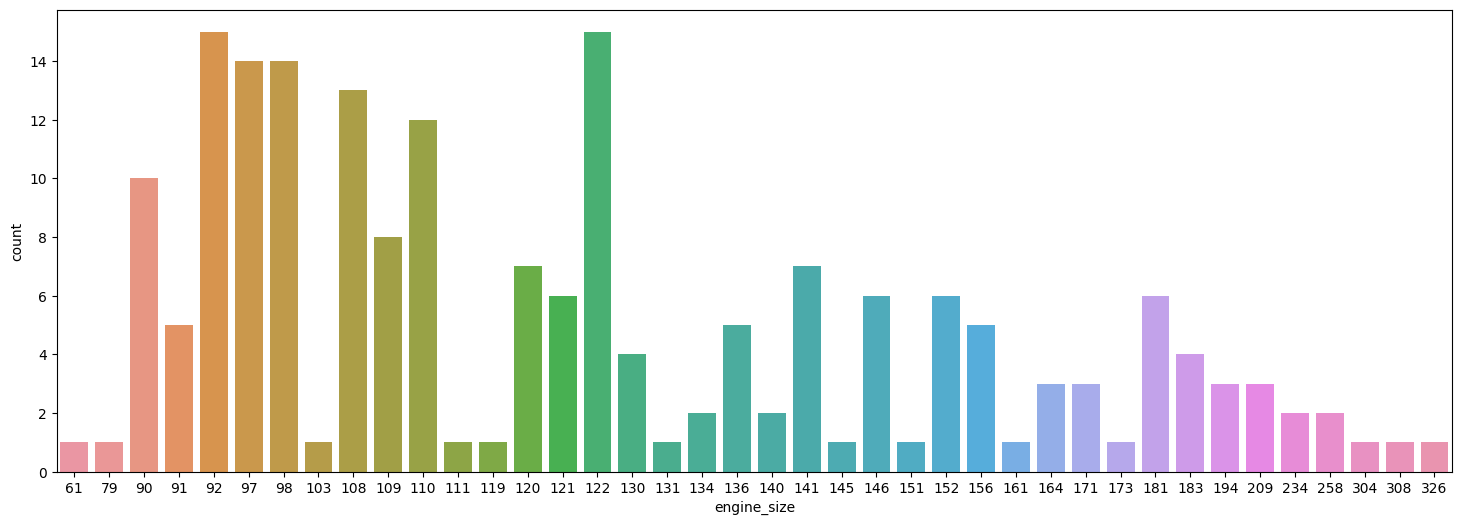

In [ ]:
plt.figure(figsize=(18,6))
sns.countplot(x='engine_size',data=df2)

<Axes: xlabel='width', ylabel='length'>

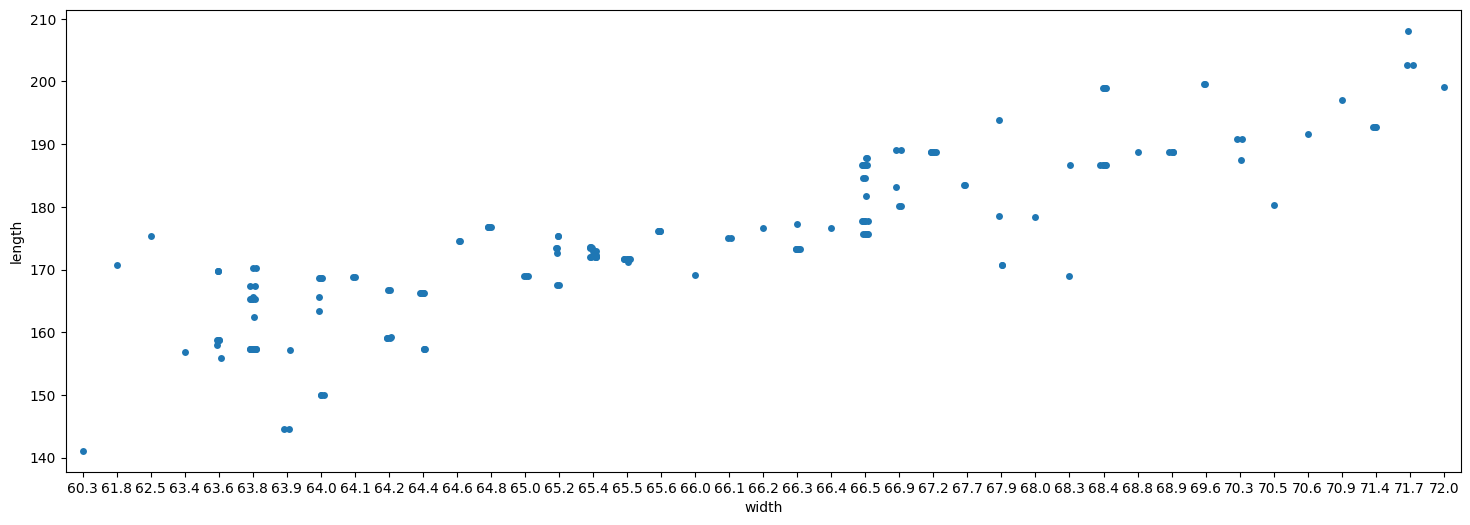

In [ ]:
plt.figure(figsize=(18,6))
sns.stripplot(y='length',x='width',data=df2)

<Figure size 2500x500 with 0 Axes>

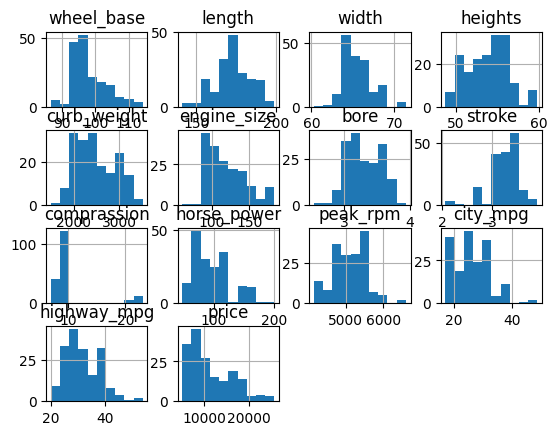

In [ ]:
plt.figure(figsize=(25,5))
df2.hist()
plt.show()

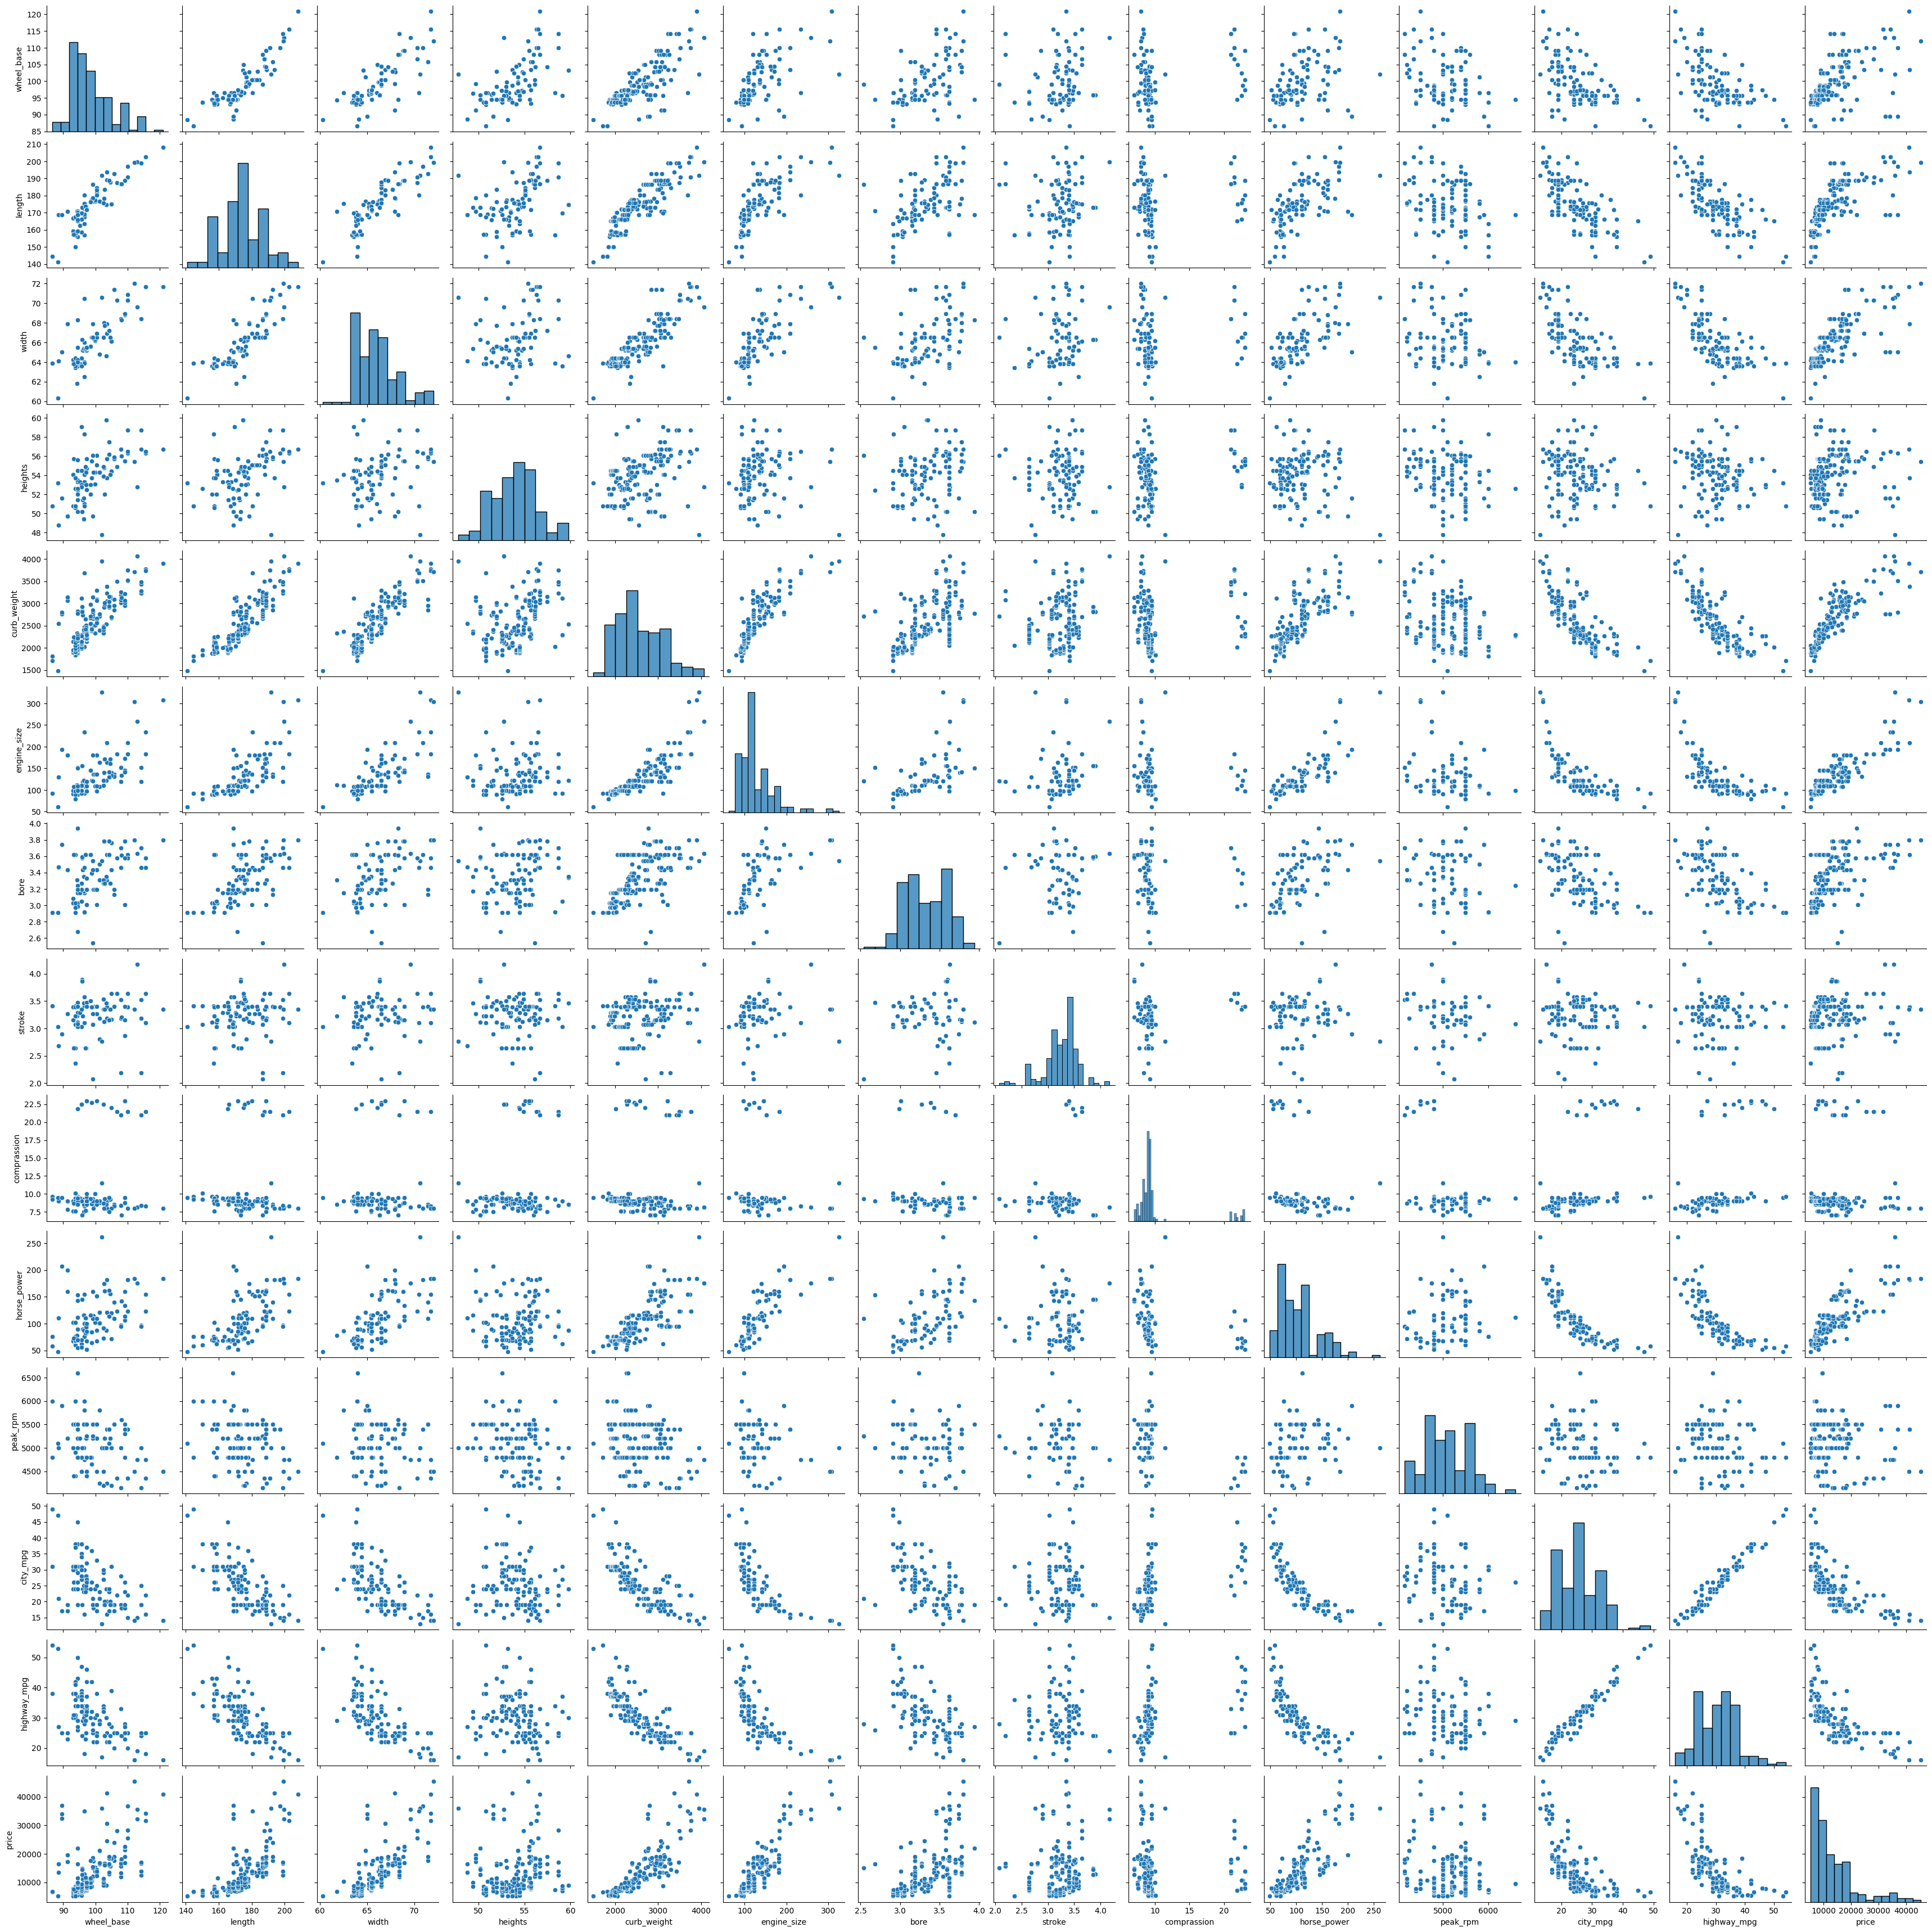

In [ ]:
sns.pairplot(df2)

#**Step 4 :Identifying significant correlations**

In [ ]:
df2.corr(method='pearson')

<ipython-input-26-c88d150c5dfe>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2.corr(method='pearson')


,wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price
wheel_base,1.000000,0.879222,0.819009,0.592500,0.782720,0.569704,0.498228,0.171722,0.247730,0.375541,-0.352331,-0.499126,-0.566355,0.585793
length,0.879222,1.000000,0.858084,0.496218,0.881665,0.687479,0.609437,0.118664,0.160172,0.583813,-0.280986,-0.689660,-0.719324,0.695331
width,0.819009,0.858084,1.000000,0.315834,0.867315,0.740320,0.544311,0.186432,0.190997,0.616779,-0.251627,-0.647099,-0.692220,0.754273
heights,0.592500,0.496218,0.315834,1.000000,0.307732,0.031286,0.189283,-0.055525,0.261160,-0.084412,-0.264078,-0.102367,-0.151188,0.138291
curb_weight,0.782720,0.881665,0.867315,0.307732,1.000000,0.857573,0.645806,0.172785,0.155382,0.760285,-0.278944,-0.772171,-0.812710,0.835729
engine_size,0.569704,0.687479,0.740320,0.031286,0.857573,1.000000,0.583091,0.211989,0.024617,0.842691,-0.219008,-0.710624,-0.732138,0.888942
bore,0.498228,0.609437,0.544311,0.189283,0.645806,0.583091,1.000000,-0.066793,0.003057,0.568527,-0.277662,-0.591950,-0.600040,0.546873
stroke,0.171722,0.118664,0.186432,-0.055525,0.172785,0.211989,-0.066793,1.000000,0.199882,0.100040,-0.068300,-0.027641,-0.036453,0.093746
comprassion,0.247730,0.160172,0.190997,0.261160,0.155382,0.024617,0.003057,0.199882,1.000000,-0.214401,-0.444582,0.331413,0.267941,0.069500
horse_power,0.375541,0.583813,0.616779,-0.084412,0.760285,0.842691,0.568527,0.100040,-0.214401,1.000000,0.105654,-0.834117,-0.812917,0.811027


<ipython-input-27-d3ce7d6c6dc6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation= df2.corr('pearson')


<Axes: >

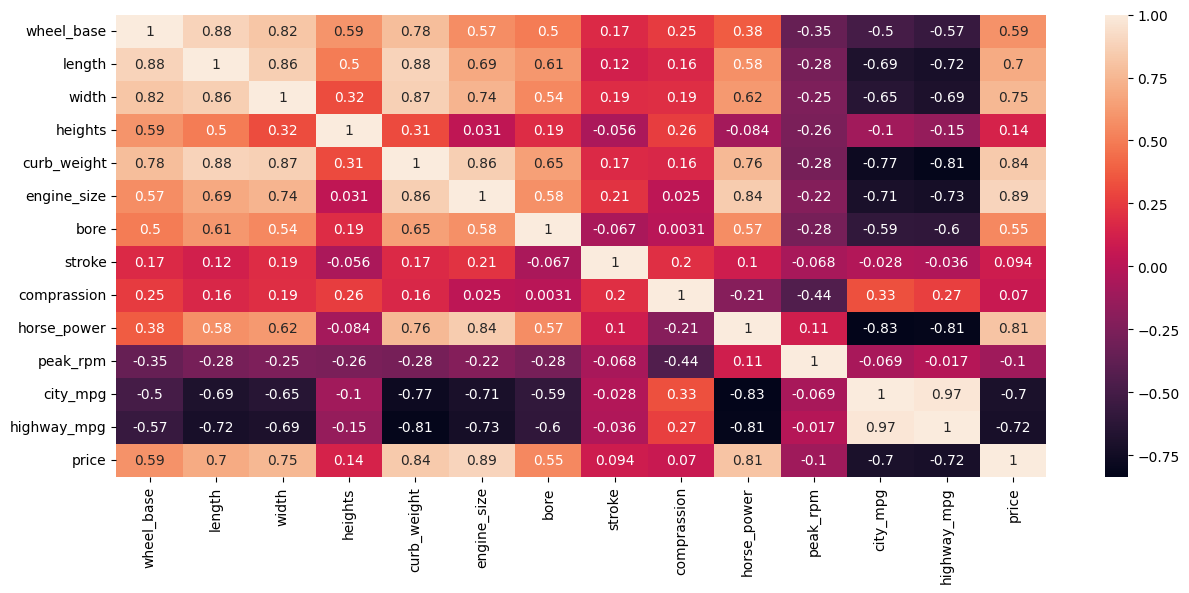

In [ ]:
plt.figure(figsize=(15,6))
correlation= df2.corr('pearson')
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot= True)

#**Step 5: Detecting and Handling outliers**

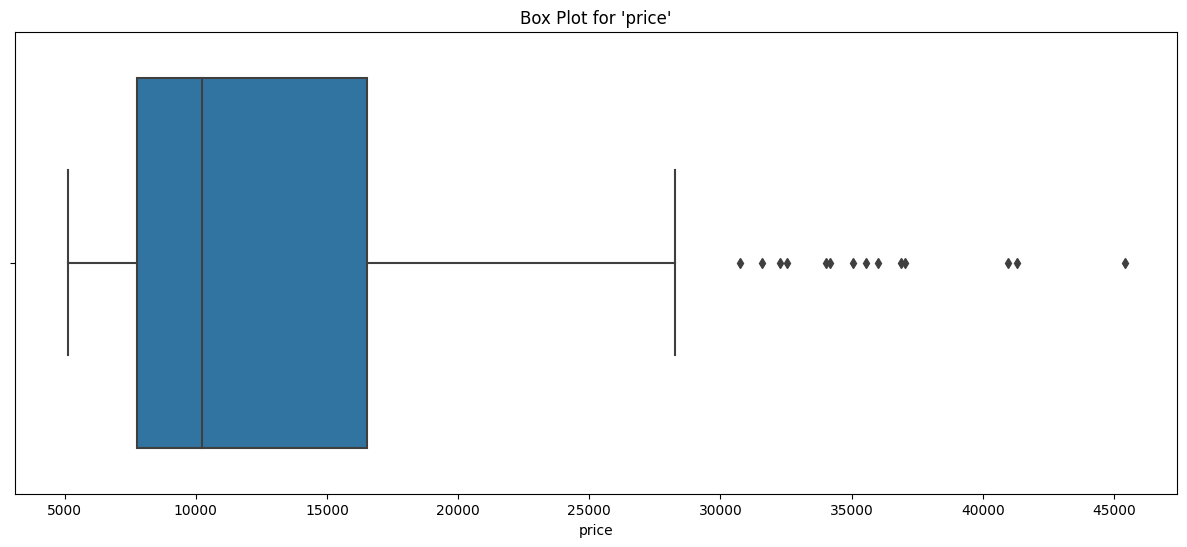

In [ ]:
plt.figure(figsize=(15, 6))
sns.boxplot(x=df2['price'])
plt.title("Box Plot for 'price'")
plt.show()

In [ ]:
df2[df2["price"] >30000]

,fuel_type,wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price
14,gas,103.5,189.0,66.9,55.7,3230,209,3.62,3.39,8.0,182.0,5400.0,16,22,30760
15,gas,103.5,193.8,67.9,53.7,3380,209,3.62,3.39,8.0,182.0,5400.0,16,22,41315
16,gas,110.0,197.0,70.9,56.3,3505,209,3.62,3.39,8.0,182.0,5400.0,15,20,36880
44,gas,113.0,199.6,69.6,52.8,4066,258,3.63,4.17,8.1,176.0,4750.0,15,19,32250
45,gas,113.0,199.6,69.6,52.8,4066,258,3.63,4.17,8.1,176.0,4750.0,15,19,35550
46,gas,102.0,191.7,70.6,47.8,3950,326,3.54,2.76,11.5,262.0,5000.0,13,17,36000
67,diesel,115.6,202.6,71.7,56.3,3770,183,3.58,3.64,21.5,123.0,4350.0,22,25,31600
68,gas,115.6,202.6,71.7,56.5,3740,234,3.46,3.10,8.3,155.0,4750.0,16,18,34184
69,gas,96.6,180.3,70.5,50.8,3685,234,3.46,3.10,8.3,155.0,4750.0,16,18,35056
70,gas,120.9,208.1,71.7,56.7,3900,308,3.80,3.35,8.0,184.0,4500.0,14,16,40960


In [ ]:
df2.drop(14,inplace=True)
df2.drop(15,inplace=True)
df2.drop(16,inplace=True)
df2.drop(44,inplace=True)
df2.drop(45,inplace=True)
df2.drop(46,inplace=True)
df2.drop(67,inplace=True)
df2.drop(68,inplace=True)
df2.drop(69,inplace=True)
df2.drop(70,inplace=True)
df2.drop(71,inplace=True)
df2.drop(123,inplace=True)
df2.drop(124,inplace=True)
df2.drop(125,inplace=True)

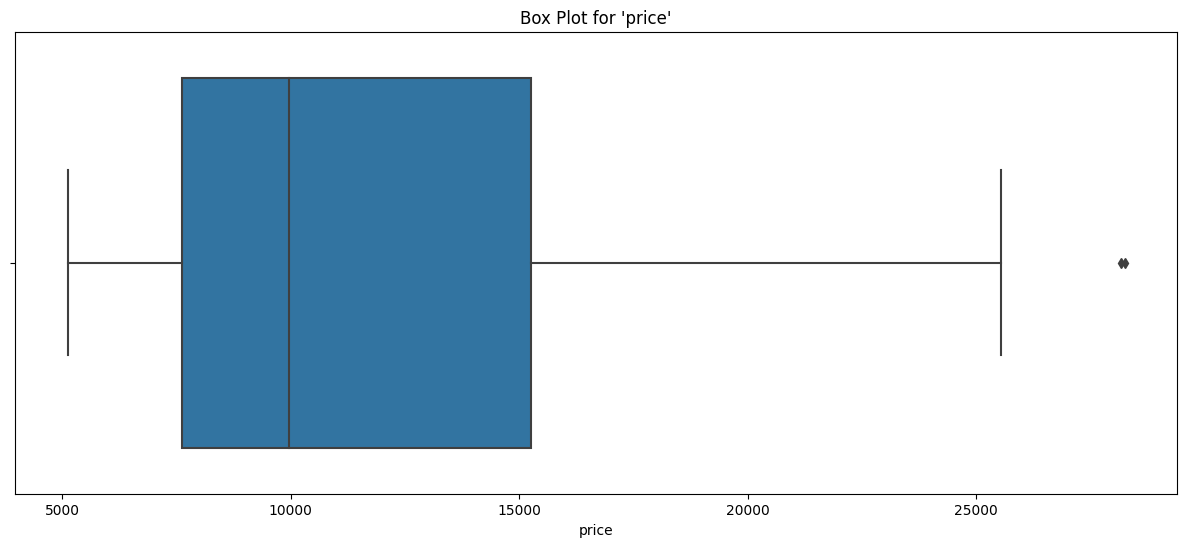

In [ ]:
plt.figure(figsize=(15, 6))
sns.boxplot(x=df2['price'])
plt.title("Box Plot for 'price'")
plt.show()

In [ ]:
df2[df2["price"] >25000]

,fuel_type,wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price
64,diesel,110.0,190.9,70.3,56.5,3515,183,3.58,3.64,21.5,123.0,4350.0,22,25,25552
65,diesel,110.0,190.9,70.3,58.7,3750,183,3.58,3.64,21.5,123.0,4350.0,22,25,28248
66,diesel,106.7,187.5,70.3,54.9,3495,183,3.58,3.64,21.5,123.0,4350.0,22,25,28176


In [ ]:
df2.drop(65,inplace=True)
df2.drop(66,inplace=True)

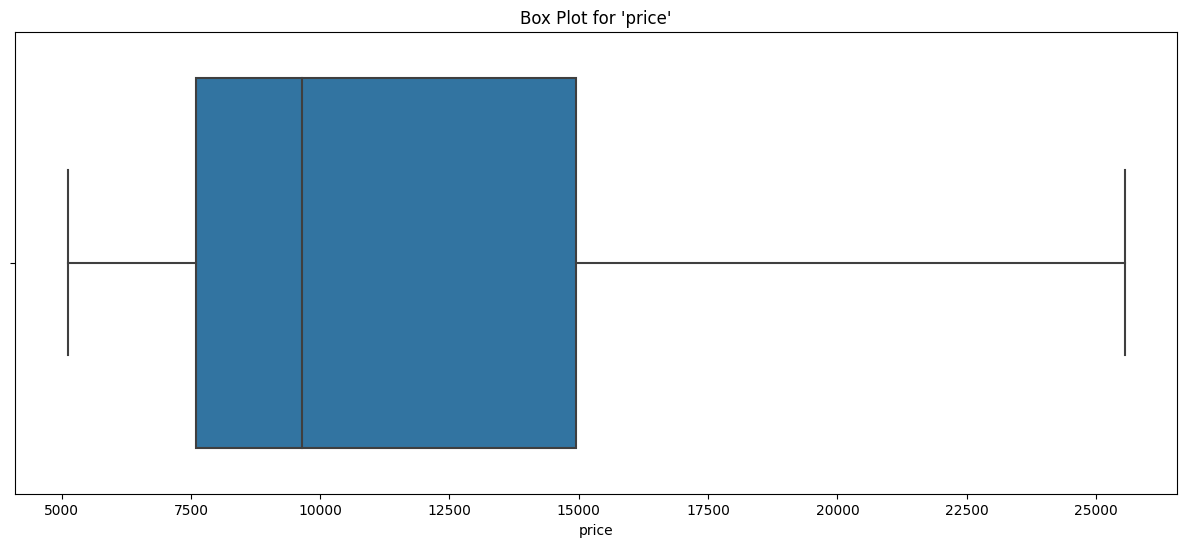

In [ ]:
plt.figure(figsize=(15, 6))
sns.boxplot(x=df2['price'])
plt.title("Box Plot for 'price'")
plt.show()

## 3. Multiple Regression Analysis ! Use the df2 dataset!

**1. Create a model that uses all the variables** and call it model1. The dependent variable is price, the independent variables are all the rest. Print out a summary of the model (coefficents, stanrard errors, confidence intervals and other metrics shown in class and answer the quesions based on your output.

In [22]:
##Your code goes here

y = df2['price']
X = df2.drop(columns=['price'])

X = sm.add_constant(X)

# Create the linear regression model
model1 = sm.OLS(y, X).fit()

print(model1.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     78.89
Date:                Mon, 23 Oct 2023   Prob (F-statistic):           5.84e-69
Time:                        04:38:02   Log-Likelihood:                -1838.5
No. Observations:                 195   AIC:                             3707.
Df Residuals:                     180   BIC:                             3756.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -4.45e+04   1.84e+04     -2.419

1. How do you interpret the intercept?
2. How many variables are statistically significant?
3. What is the variance of the model?
4. What is the coefficeint of determination and how do you interpret it?
5. What is the F-statistics used for? How do you interpret it for this model?

**2. Drop all the variables that are not statistically significant** at least at 90% confidence level. Run another regression model with price as the dependent variable and the rest of the variables as the independent variabls. Call it model2. Print a summary of the results and answer the questions bellow.

In [23]:

p_values = model1.pvalues


alpha = 0.1


significant_vars = p_values[p_values < alpha]


X_model2 = X[significant_vars.index]


model2 = sm.OLS(y, X_model2).fit()


print(model2.summary())



                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     136.5
Date:                Mon, 23 Oct 2023   Prob (F-statistic):           1.29e-73
Time:                        04:38:09   Log-Likelihood:                -1842.2
No. Observations:                 195   AIC:                             3702.
Df Residuals:                     186   BIC:                             3732.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -6.156e+04   1.49e+04     -4.138

1. How do you interpret the intercept?
2. How many variables are statistically significant?
3. What is the variance of the model?
4. What is the coefficeint of determination and how do you interpret it? What is the Adjusted R-squared and compare it to the model1's value.
5. What is the F-statistics used for? How do you interpret it for this model?

**3. Compare the two models with ANOVA**. What are your null and alternative hypothesis? What is your conclusion?

In [ ]:
##your code goes here
from scipy.stats import f


rss_model1 = model1.ssr
rss_model2 = model2.ssr




df1 = len(model1.params) - 1
df2 = len(model2.params) - 1


f_statistic = ((rss_model1 - rss_model2) / (df1 - df2)) / (rss_model2 / df2)


alpha = 0.05


critical_f_value = f.ppf(1 - alpha, dfn=df1 - df2, dfd=df2)

# Compare the F-statistic to the critical F-value
if f_statistic > critical_f_value:
    print("Reject the null hypothesis. There is a significant difference between the models.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between the models.")


Fail to reject the null hypothesis. There is no significant difference between the models.


In [ ]:
# Perform ANOVA to compare model1 and model2
from statsmodels.stats.anova import anova_lm

# Model comparison
anova_results = anova_lm(model1, model2)

# Print ANOVA table
print(anova_results)


   df_resid           ssr  df_diff       ss_diff        F  Pr(>F)
0     180.0  1.764456e+09      0.0           NaN      NaN     NaN
1     186.0  1.832575e+09     -6.0 -6.811918e+07  1.15231     NaN


**4.Checking the assumptions:**

-What are the assumptions?

-Do they hold?

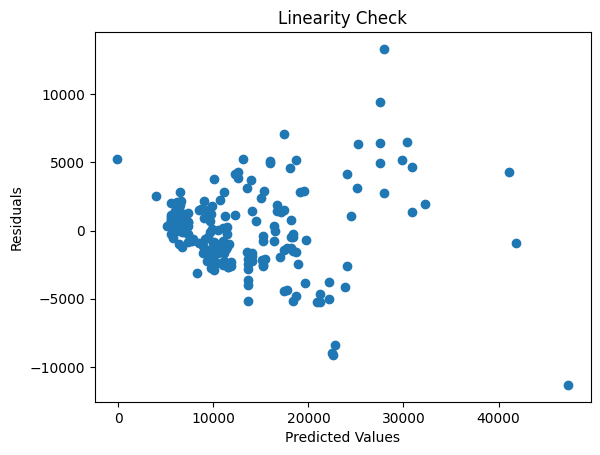

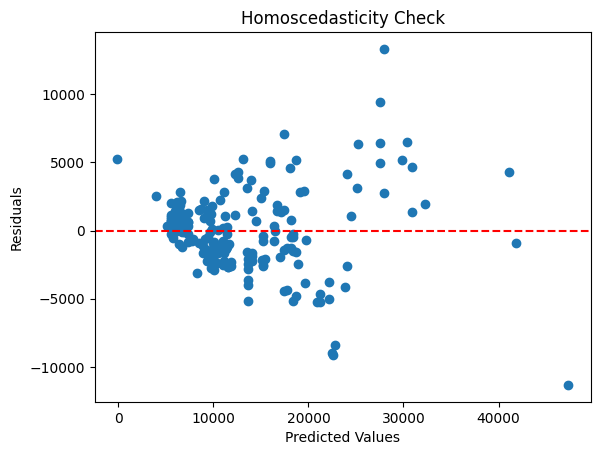

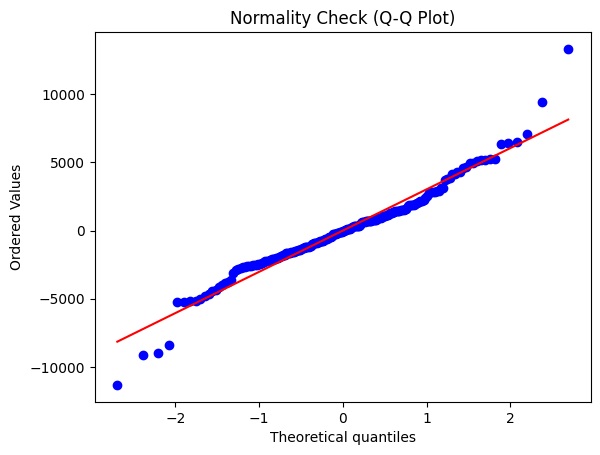

In [ ]:
##your code goes here
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import numpy as np

# Assuming you already have 'model2' fitted and the data loaded

# Residuals from model2
residuals = model2.resid

# Linearity: You can check this by plotting the observed vs. predicted values
predicted = model2.predict()
plt.scatter(predicted, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Linearity Check")
plt.show()

# Independence: There's no direct test for independence, but you can use a Durbin-Watson test to check for autocorrelation
from statsmodels.stats.stattools import durbin_watson
durbin_watson_stat = durbin_watson(residuals)
if durbin_watson_stat >= 1.5 and durbin_watson_stat <= 2.5:
    print("Independence assumption appears to be satisfied.")

# Homoscedasticity: You can check this by plotting the residuals vs. the predicted values
plt.scatter(predicted, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Homoscedasticity Check")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Normality: You can use a Q-Q plot or a normality test (e.g., Shapiro-Wilk)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Normality Check (Q-Q Plot)")
plt.show()

# Shapiro-Wilk test for normality
shapiro_test = stats.shapiro(residuals)
if shapiro_test[1] > 0.05:
    print("Normality assumption appears to be satisfied (p-value > 0.05).")


**5. Is there Multicollinearity in your data?**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming you have already fitted 'model2' and have your independent variables in 'X_model2'

# Calculate VIF for each independent variable in 'X_model2'
vif = pd.DataFrame()
vif["Variable"] = X_model2.columns
vif["VIF"] = [variance_inflation_factor(X_model2.values, i) for i in range(X_model2.shape[1])]

# Print the VIF values
print(vif)


        Variable          VIF
0          const  4381.053717
1          width     3.453717
2        heights     1.446871
3    engine_size     6.366954
4         stroke     1.168317
5    horse_power     6.977935
6       peak_rpm     1.762428
7    highway_mpg     4.427812
8  fuel_type_gas     1.815545


In [ ]:
##your code goes here
df[df.columns].corr(method='pearson')

<ipython-input-18-47ac47a5a5d3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df[df.columns].corr(method='pearson')


,wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price
wheel_base,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.494884,0.158502,0.250313,0.371621,-0.360593,-0.470606,-0.543304,0.584642
length,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.610051,0.124139,0.159733,0.580309,-0.286321,-0.665192,-0.698142,0.690628
width,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544924,0.188829,0.189867,0.615315,-0.245975,-0.633531,-0.680635,0.751265
heights,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.185907,-0.062704,0.259737,-0.087407,-0.311574,-0.049800,-0.104812,0.135486
curb_weight,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644617,0.167562,0.156433,0.758063,-0.279375,-0.749543,-0.794889,0.834415
engine_size,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.582857,0.209523,0.028889,0.822713,-0.256773,-0.650546,-0.679571,0.872335
bore,0.494884,0.610051,0.544924,0.185907,0.644617,0.582857,1.000000,-0.055390,0.001250,0.568527,-0.277662,-0.592655,-0.599218,0.543436
stroke,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.100040,-0.068300,-0.034696,-0.035201,0.082310
comprassion,0.250313,0.159733,0.189867,0.259737,0.156433,0.028889,0.001250,0.187923,1.000000,-0.214576,-0.436015,0.331425,0.268465,0.071107
horse_power,0.371621,0.580309,0.615315,-0.087407,0.758063,0.822713,0.568527,0.100040,-0.214576,1.000000,0.107882,-0.822617,-0.804596,0.810533


<ipython-input-19-1ef3696c1896>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(method='pearson'),annot=True);


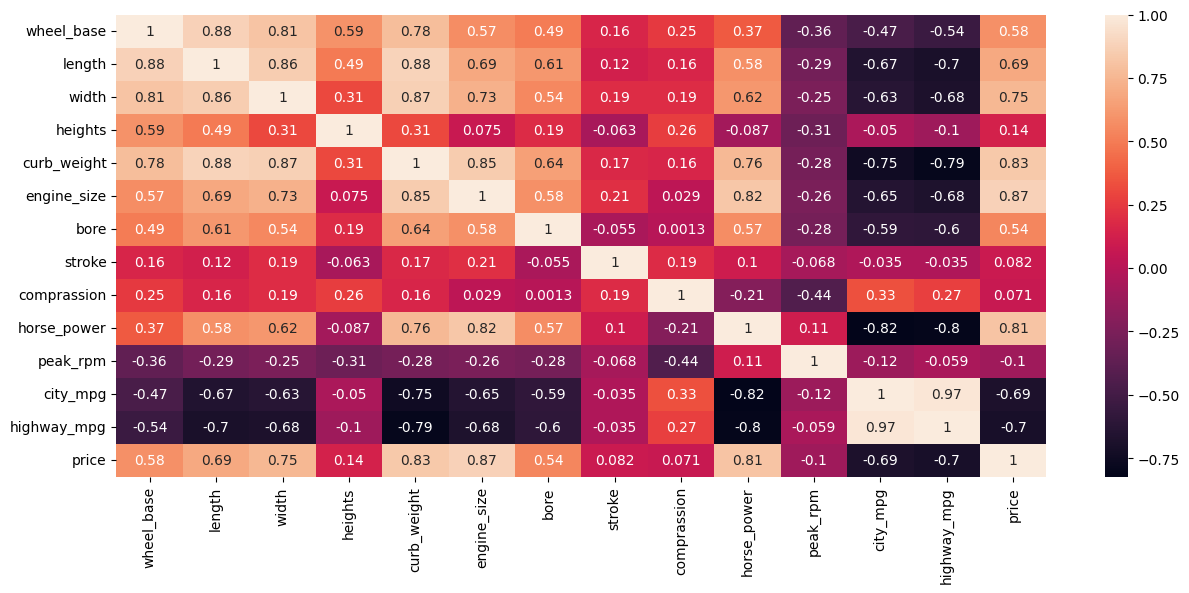

In [ ]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(method='pearson'),annot=True);